#### Problem Statement: To categorise the people whose credit card applications were  wrongly accepted and thus commiting fraud using Self Organising Maps.

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8603 sha256=b6f0c868746629ac6005b79cf4f5bbc37b5d56188eaddf392f58f5f70a36231f
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\20\ac\08\bf890821fa2cebf9c3a1ba9167e64c5d038885f9cb2abc5b9b
Successfully built MiniSom


### Importing the libraries


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

## Importing the dataset

In [24]:
dataset = pd.read_csv('D:/MTech-DSML/Deep Learning/Udemy/SOM/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values
X.shape

(690, 15)

## Feature Scaling


In [25]:
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

## Training the SOM


In [26]:
# Building a 10x10 grid with the 15 input features
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the results


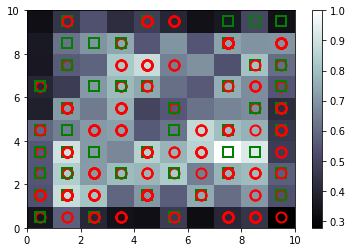

In [28]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

##### The plot above states that the white squares corresponding to a correlation of 1 have commited fraud.

## Finding the frauds


In [29]:
# From the plot, extracting only the people who have commited fraud
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

## Printing the Fraunch Clients

In [30]:
print('Fraud Customer IDs:')
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs:
15608595
15719940
15761158
15711742
15761733
15770995
15666166
15605872
15736399
15766734
15667934
15665087
15726466
15692408
15694530
15763108
15723989
15730287
15720353
15728906
15736510
15708236
15686670
15736420
15765093
15737542
15748691
15748986
15727811


### Inference: In this way we can recognise the incorrectly classified data. That is the people whose credit cards should have been rejected are accepted and thus commiting fraud.